<a href="https://colab.research.google.com/github/KellieLeonard-Biostat/ResNet-18-CNN/blob/main/CR_CNN_PROTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages
!pip install --quiet torch torchvision

# Check GPU availability
import torch
print("GPU available:", torch.cuda.is_available())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.0 MB/s eta 0:00:00
GPU available: True


In [ ]:
!wget -O NCT-CRC-HE-100K.zip "https://zenodo.org/record/1214456/files/NCT-CRC-HE-100K.zip?download=1"


--2025-07-26 13:01:05--  https://zenodo.org/record/1214456/files/NCT-CRC-HE-100K.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1214456/files/NCT-CRC-HE-100K.zip [following]
--2025-07-26 13:01:06--  https://zenodo.org/records/1214456/files/NCT-CRC-HE-100K.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 11690284003 (11G) [application/octet-stream]
Saving to: ‘NCT-CRC-HE-100K.zip’

NCT-CRC-HE-100K.zip 100%[===================>]  10.89G  9.40MB/s    in 41m 41s 

2025-07-26 13:42:47 (4.46 MB/s) - ‘NCT-CRC-HE-100K.zip’ saved [11690284003/11690284003]



In [ ]:
!unzip -q NCT-CRC-HE-100K.zip -d NCT-CRC-HE-100K


In [ ]:
import os
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch

data_folder = "NCT-CRC-HE-100K"

# List subfolders (these are your classes)
class_folders = os.listdir(data_folder)
print("Classes found:")
print(class_folders)


Classes found:
['NCT-CRC-HE-100K']


In [ ]:
import os
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import os

data_folder = "NCT-CRC-HE-100K/NCT-CRC-HE-100K"
subfolder = "BACK"  # you can change this to any of the other folder names to check

subfolder_path = os.path.join(data_folder, subfolder)
print(f"Files inside {subfolder} folder:")
print(os.listdir(subfolder_path)[:10])  # show first 10 files

In [ ]:
from torchvision import datasets
from torch.utils.data import random_split

# Define your transform (common for both splits initially)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Dataset with all images
full_dataset = datasets.ImageFolder("NCT-CRC-HE-100K/NCT-CRC-HE-100K", transform=transform)

# Split sizes (e.g., 80% train, 20% val)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

print("Classes:", full_dataset.classes)
print("Train samples:", len(train_dataset))
print("Validation samples:", len(val_dataset))


In [ ]:
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)

# Replace final FC layer
num_classes = len(full_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    # --- Training ---
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # --- Validation ---
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_epoch_loss = val_loss / len(val_loader.dataset)
    val_acc = correct / total

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {epoch_loss:.4f} | Val Loss: {val_epoch_loss:.4f} | Val Acc: {val_acc:.4f}")

print("Training complete!")


Epoch 1/10 | Train Loss: 0.0989 | Val Loss: 0.0468 | Val Acc: 0.9852
Epoch 2/10 | Train Loss: 0.0394 | Val Loss: 0.0478 | Val Acc: 0.9840
Epoch 3/10 | Train Loss: 0.0267 | Val Loss: 0.0313 | Val Acc: 0.9909
Epoch 4/10 | Train Loss: 0.0220 | Val Loss: 0.0509 | Val Acc: 0.9838
Epoch 5/10 | Train Loss: 0.0179 | Val Loss: 0.0315 | Val Acc: 0.9906
Epoch 6/10 | Train Loss: 0.0147 | Val Loss: 0.0302 | Val Acc: 0.9908
Epoch 7/10 | Train Loss: 0.0138 | Val Loss: 0.0343 | Val Acc: 0.9891
Epoch 8/10 | Train Loss: 0.0116 | Val Loss: 0.0187 | Val Acc: 0.9942
Epoch 9/10 | Train Loss: 0.0096 | Val Loss: 0.0229 | Val Acc: 0.9941
Epoch 10/10 | Train Loss: 0.0095 | Val Loss: 0.0190 | Val Acc: 0.9942
Training complete!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
torch.save(model.state_dict(), "/content/drive/MyDrive/cnn_model.pth")


In [ ]:
train_losses = [0.1012, 0.0395, 0.0269, 0.0214, 0.0174, 0.0151, 0.0124, 0.0128, 0.0109, 0.0090]
val_losses   = [0.0365, 0.0355, 0.0345, 0.0243, 0.0203, 0.0345, 0.0294, 0.0224, 0.0271, 0.0294]
val_accuracies = [0.9892, 0.9875, 0.9886, 0.9926, 0.9939, 0.9891, 0.9919, 0.9936, 0.9914, 0.9909]


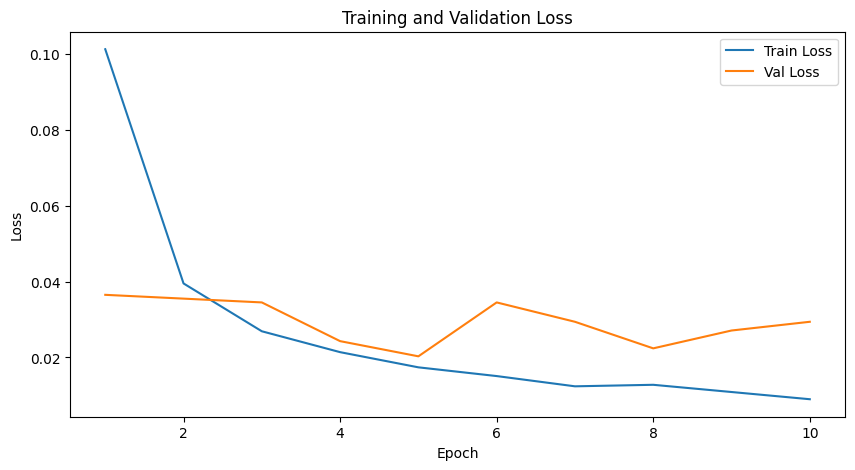

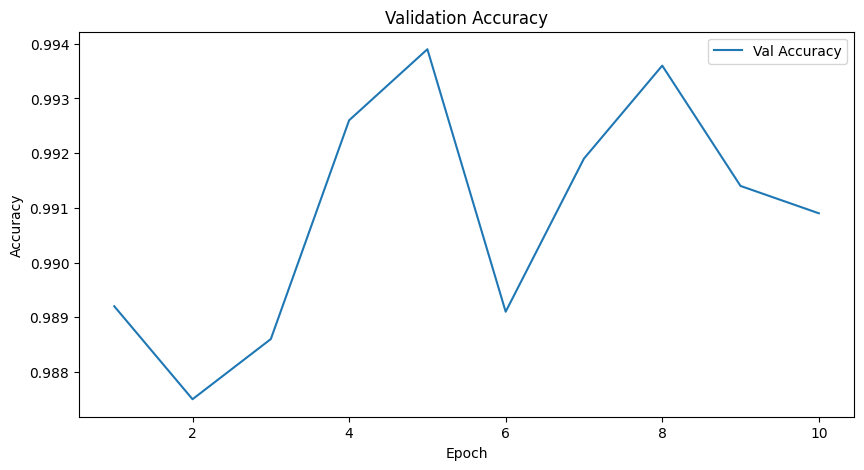

In [ ]:
import matplotlib.pyplot as plt

num_epochs = len(train_losses)

# Loss plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
print(f"Final Train Loss: {train_losses[-1]:.4f}")
print(f"Final Val Loss: {val_losses[-1]:.4f}")
print(f"Final Val Accuracy: {val_accuracies[-1]*100:.2f}%")


NameError: name 'train_losses' is not defined

In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.9 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

# Set your token
ngrok.set_auth_token("2yxRZ3o6C5dvQW29Isf2ZC4s86l_6qWXifhiZ5UUAreVjUDPu")


In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install tifffile


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import numpy as np
import tifffile

class_names = ['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM']

flags = {
    'ADI': 'Not Urgent',
    'BACK': 'Not Urgent',
    'DEB': 'Not Urgent',
    'LYM': 'Not Urgent',
    'MUC': 'Not Urgent',
    'MUS': 'Not Urgent',
    'NORM': 'Not Urgent',
    'STR': 'Urgent',
    'TUM': 'Urgent'
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))
model.load_state_dict(torch.load("cnn_model.pth", map_location=device))
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

st.title("CRC Histology Image Classifier")
st.write("Upload a CRC histology image (TIFF, PNG, JPG) to get the predicted class.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png", "tif", "tiff"])

if uploaded_file is not None:
    try:
        tiff_array = tifffile.imread(uploaded_file)
        if tiff_array.ndim == 2:
            tiff_array = np.stack([tiff_array]*3, axis=-1)
        elif tiff_array.shape[2] == 1:
            tiff_array = np.repeat(tiff_array, 3, axis=-1)
        elif tiff_array.shape[2] > 3:
            tiff_array = tiff_array[:, :, :3]
        if tiff_array.dtype != np.uint8:
            tiff_array = tiff_array.astype(np.float32)
            tiff_array = 255 * (tiff_array - np.min(tiff_array)) / (np.ptp(tiff_array) + 1e-5)
            tiff_array = tiff_array.astype(np.uint8)
        image = Image.fromarray(tiff_array)
        st.image(image, caption="Uploaded image", use_column_width=True)
        input_tensor = transform(image).unsqueeze(0).to(device)
        with torch.no_grad():
            output = model(input_tensor)
            _, predicted = torch.max(output, 1)
        predicted_class = class_names[predicted.item()]
        flag = flags[predicted_class]
        st.success(f"**Predicted class: {predicted_class}**")
        if flag == "Urgent":
            st.markdown(f"<span style='color:red; font-weight:bold;'>Flag: {flag}</span>", unsafe_allow_html=True)
        else:
            st.markdown(f"<span style='color:green; font-weight:bold;'>Flag: {flag}</span>", unsafe_allow_html=True)
    except Exception as e:
        st.error(f"Error loading image: {e}")


Writing app.py


In [ ]:
from pyngrok import ngrok
import os

# Kill existing streamlit if any
!pkill streamlit

# Make sure to run your Streamlit app first in the background
os.system("streamlit run app.py &")

# Now start ngrok tunnel on port 8501
public_url = ngrok.connect(8501)
print("Streamlit app URL:", public_url)


Streamlit app URL: NgrokTunnel: "https://094ba8674c74.ngrok-free.app" -> "http://localhost:8501"


Load model later code

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# 1. Recreate the model structure
model = models.resnet18(pretrained=False)  # or your custom CNN

# 2. Load saved weights
model.load_state_dict(torch.load("cnn_model.pth"))

# 3. Set model to evaluation mode (important for inference)
model.eval()
